In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import scipy

## Read the data

In [2]:
data = pd.read_excel('merged_data.xlsx', index_col = 0)

In [3]:
data.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [4]:
data.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

## List the states

In [5]:
data['State'].value_counts()

TX    254
GA    159
VA    132
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
PA     67
AL     67
SD     65
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
MD     24
AK     23
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      5
DE      3
DC      1
Name: State, dtype: int64

In [6]:
len(data['State'].unique()) #total no. of states

51

In [7]:
columns = ['State', 'AreaName', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
           'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'Incidence_Rate', 'Avg_Ann_Incidence', 
           'Mortality_Rate', 'Avg_Ann_Deaths', 'All_With', 'All_Without']
data_reduced = data[columns]

In [8]:
data_reduced.head()

,State,AreaName,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,All_With,All_Without
0,AK,"Aleutians East Borough, Alaska",334,219,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,*,3 or fewer,*,*,1442,1857
1,AK,"Aleutians West Census Area, Alaska",273,226,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,*,3 or fewer,*,*,4177,1333
2,AK,"Anchorage Municipality, Alaska",10698,13216,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,61.5,131,47.3,96,243173,44638
3,AK,"Bethel Census Area, Alaska",2199,2165,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,62.7,6,58.3,5,13023,4482
4,AK,"Bristol Bay Borough, Alaska",33,36,79750.0,88000.0,NaN,63333.0,NaN,25625.0,*,3 or fewer,*,*,768,191


## Remove strings in numeric fields

In [9]:
def map_fun(x):
    if x == '*':
        return np.nan
    else:
        return re.sub('\D', '', str(x))
data_reduced['Incidence_Rate'] = pd.to_numeric(data_reduced['Incidence_Rate'].apply(map_fun))
data_reduced['Mortality_Rate'] = data_reduced['Mortality_Rate'].replace('*', np.nan)

C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
data_reduced['Population'] = data_reduced['All_Without'] + data_reduced['All_With']

C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_reduced.describe()

,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Mortality_Rate,All_With,All_Without,Population
count,3134.000000,3134.000000,3133.000000,3132.000000,1924.000000,1474.000000,1377.000000,2453.000000,2714.000000,2809.000000,3.134000e+03,3.134000e+03,3.134000e+03
mean,6828.800893,8400.855775,46819.837855,49490.181992,34750.214137,43309.998643,65412.969499,41118.231553,633.265291,53.188537,8.646320e+04,1.289966e+04,9.936286e+04
std,24719.078097,29865.855831,12246.380184,12461.508031,18198.952565,23707.973354,34012.807537,16232.191608,256.345683,14.042077,2.699985e+05,5.331494e+04,3.204533e+05
min,5.000000,5.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,25.000000,9.200000,6.700000e+01,8.000000e+00,7.500000e+01
25%,758.750000,957.000000,38826.000000,41393.500000,23747.250000,28895.750000,45974.000000,31563.000000,532.000000,43.700000,9.173500e+03,1.388250e+03,1.069575e+04
50%,1925.000000,2372.000000,45075.000000,47430.000000,30000.000000,39014.000000,60405.000000,38347.000000,672.000000,52.600000,2.144800e+04,3.323500e+03,2.502300e+04
75%,4697.500000,5812.500000,52224.000000,54534.500000,40570.250000,53199.250000,78504.000000,47500.000000,785.000000,61.200000,5.756150e+04,8.240000e+03,6.578550e+04
max,823612.000000,976653.000000,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000,2037.000000,125.600000,8.134459e+06,1.834501e+06,9.968960e+06


In [13]:
top8 = data['State'].value_counts().index[:8]
df = data_reduced[data_reduced['State'].isin(top8)]

In [14]:
df.head()

,State,AreaName,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,All_With,All_Without,Population
381,GA,"Appling County, Georgia",1485,2260,37135.0,39981.0,26130.0,NaN,NaN,30907.0,744.0,15,56.3,12,14236,3717,17953
382,GA,"Atkinson County, Georgia",1068,1302,30933.0,34130.0,24598.0,NaN,NaN,24009.0,594.0,5,75.8,6,5771,2497,8268
383,GA,"Bacon County, Georgia",850,1069,37162.0,42561.0,20302.0,NaN,34706.0,42802.0,875.0,11,66.5,8,8681,2020,10701
384,GA,"Baker County, Georgia",287,465,44297.0,51538.0,26806.0,NaN,NaN,NaN,729.0,3,NaN,*,2602,690,3292
385,GA,"Baldwin County, Georgia",5601,7600,32460.0,39592.0,22906.0,NaN,39524.0,NaN,735.0,36,47.3,23,37782,5744,43526


## Verifying the independence and identical distribution of Med_Income

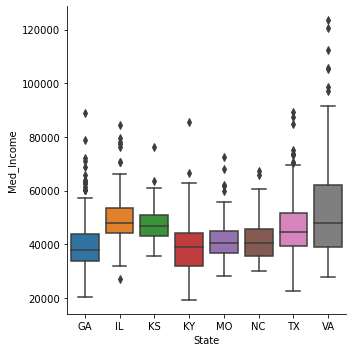

In [18]:
#plt.figure(figsize = (10, 20))
sns.catplot(x = "State", y = "Med_Income", kind = 'box', data = df)
plt.savefig('a.png')

In [19]:
df.describe()

,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Mortality_Rate,All_With,All_Without,Population
count,1087.000000,1087.000000,1086.000000,1086.000000,746.000000,384.000000,408.000000,861.000000,928.000000,982.000000,1.087000e+03,1.087000e+03,1.087000e+03
mean,5223.596136,6503.724011,45179.418969,47919.604052,33891.183646,48324.817708,67067.117647,40826.430894,686.592672,56.540530,6.162615e+04,1.129411e+04,7.292026e+04
std,19901.700159,24463.968771,12271.292167,12702.452411,16882.028215,28919.247513,37645.754919,17924.633904,274.574705,14.482482,2.150451e+05,4.881002e+04,2.613012e+05
min,5.000000,5.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,32.000000,20.700000,8.600000e+01,3.100000e+01,1.170000e+02
25%,725.500000,929.000000,37467.750000,40170.500000,23433.250000,29513.000000,44745.750000,30948.000000,588.000000,47.200000,8.236500e+03,1.339500e+03,9.860500e+03
50%,1636.000000,2067.000000,43166.500000,45613.500000,29661.500000,42795.500000,60638.500000,37617.000000,723.000000,55.350000,1.740600e+04,3.002000e+03,2.041700e+04
75%,3754.500000,4540.500000,50394.500000,53005.750000,39858.500000,60843.000000,82693.750000,46985.000000,836.250000,63.825000,4.065400e+04,6.874000e+03,4.831150e+04
max,392713.000000,486786.000000,123453.000000,136311.000000,157917.000000,250001.000000,250001.000000,223750.000000,1575.000000,125.600000,4.451741e+06,1.020251e+06,5.192597e+06


## States GA and KY

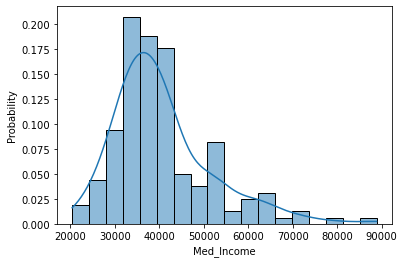

In [20]:
sns.histplot(data = df[df['State'] == 'GA'], x = 'Med_Income', kde = True, stat = 'probability')
plt.savefig('a.png')

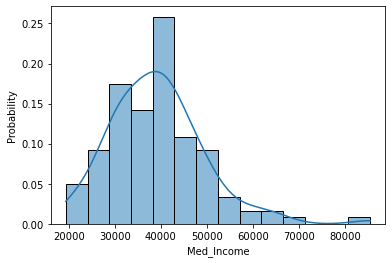

In [21]:
sns.histplot(data = df[df['State'] == 'KY'], x = 'Med_Income', kde = True, stat = 'probability')
plt.savefig('a.png')

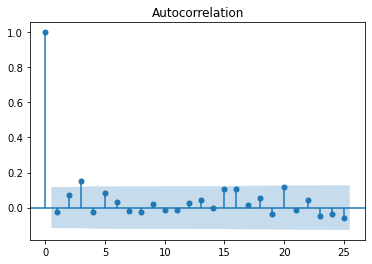

In [22]:
df_1 = df[df['State'].isin(['GA', 'KY'])]
sm.graphics.tsa.plot_acf(df_1['Med_Income'])
plt.savefig('a.png')

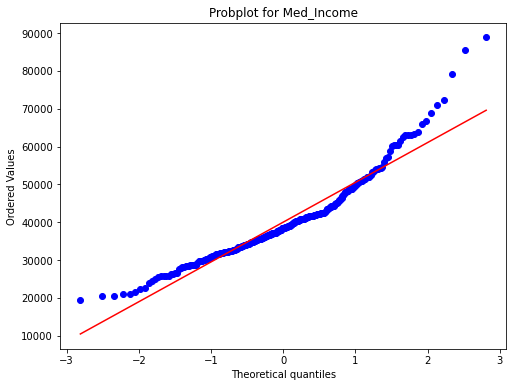

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
a = scipy.stats.probplot(df_1['Med_Income'], plot = ax)
ax.set_title("Probplot for Med_Income")
plt.savefig('a.png')

## States MO and NC

<AxesSubplot:xlabel='Med_Income', ylabel='Probability'>

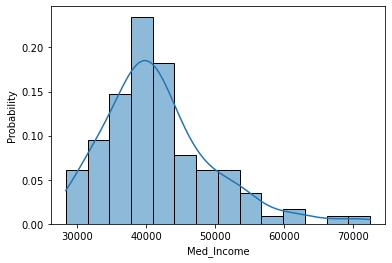

In [20]:
sns.histplot(data = df[df['State'] == 'MO'], x = 'Med_Income', kde = True, stat = 'probability')

<AxesSubplot:xlabel='Med_Income', ylabel='Probability'>

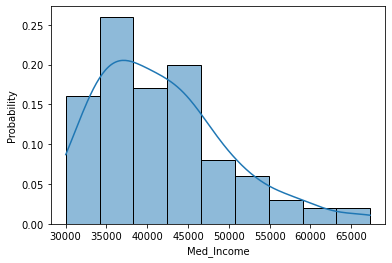

In [21]:
sns.histplot(data = df[df['State'] == 'NC'], x = 'Med_Income', kde = True, stat = 'probability')

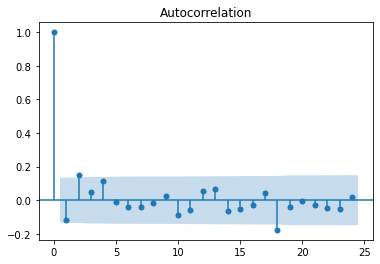

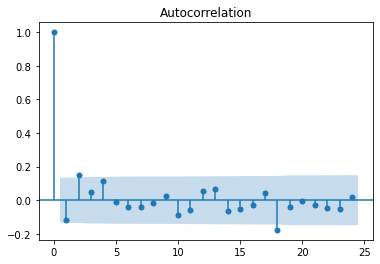

In [22]:
df_2 = df[df['State'].isin(['MO', 'NC'])]
sm.graphics.tsa.plot_acf(df_2['Med_Income'])

## States KS and IL

<AxesSubplot:xlabel='Med_Income', ylabel='Probability'>

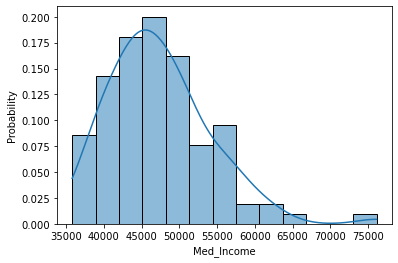

In [22]:
sns.histplot(data = df[df['State'] == 'KS'], x = 'Med_Income', kde = True, stat = 'probability')

<AxesSubplot:xlabel='Med_Income', ylabel='Probability'>

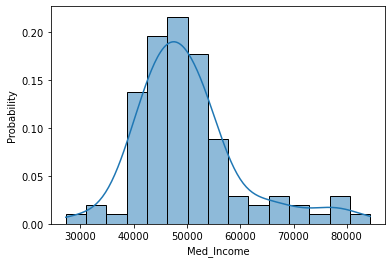

In [23]:
sns.histplot(data = df[df['State'] == 'IL'], x = 'Med_Income', kde = True, stat = 'probability')

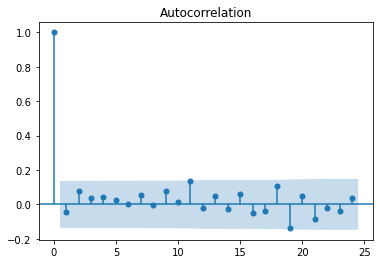

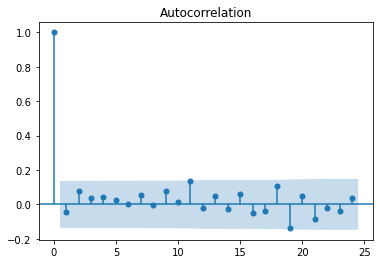

In [23]:
df_3 = df[df['State'].isin(['KS', 'IL'])]
sm.graphics.tsa.plot_acf(df_3['Med_Income'])

In [24]:
df_3.describe()

,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Mortality_Rate,All_With,All_Without,Population
count,207.000000,207.000000,207.000000,207.000000,84.000000,74.000000,80.000000,166.000000,102.000000,171.000000,2.070000e+02,207.000000,2.070000e+02
mean,4717.178744,5826.159420,48722.236715,49790.048309,35856.964286,44319.513514,61528.212500,42591.102410,712.813725,53.517544,6.672146e+04,8293.497585,7.501496e+04
std,27671.115205,34276.382372,8569.333879,8923.723817,19498.210439,22246.306180,35689.778588,14427.151911,243.545134,10.411150,3.243214e+05,52376.976534,3.762572e+05
min,38.000000,44.000000,27265.000000,34142.000000,2499.000000,2499.000000,2499.000000,2499.000000,54.000000,26.500000,1.118000e+03,78.000000,1.196000e+03
25%,312.000000,391.500000,43711.500000,43953.500000,23533.000000,28202.250000,40983.500000,35000.000000,663.000000,46.200000,5.264000e+03,543.000000,5.787000e+03
50%,859.000000,1137.000000,47434.000000,48139.000000,30997.000000,42410.500000,59687.500000,41152.000000,761.500000,52.800000,1.400400e+04,1401.000000,1.561100e+04
75%,2248.000000,2948.500000,52237.000000,53425.000000,44228.250000,55397.250000,76025.250000,51861.750000,864.750000,60.000000,3.139800e+04,3598.500000,3.422250e+04
max,392713.000000,486786.000000,84385.000000,86339.000000,105039.000000,110543.000000,250001.000000,83452.000000,1131.000000,80.200000,4.451741e+06,740856.000000,5.192597e+06


In [25]:
#Save the datasets
df_1.to_csv('df_1.csv')
df_2.to_csv('df_2.csv')
df_3.to_csv('df_3.csv')